In [1]:
#Data
import pandas as pd
import numpy as np
#Graphics 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Dataset de Kaggle

Data sobre Google play store

Link: https://www.kaggle.com/lava18/google-play-store-apps

### Apertura Dataframe

In [2]:
google_df = pd.read_csv(r'C:\Users\Lucas\Desktop\Data Science\clusterai_2022-main\clase01\googleplaystore.csv')
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print(f'Dimension:  {np.shape(google_df)}')

filas = np.shape(google_df)[0] # [0] para la primera dimension
print(f'Número de filas: {filas}')

columnas = np.shape(google_df)[1] # [1] para la segunda dimension
print(f'Número de columnas: {columnas}')

google_df.head(5)

Dimension --> (10841, 13)
Número de filas: 10841
Número de columnas: 13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
nombre_columnas = google_df.columns.values
nombre_columnas

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

### Limpieza de datos

In [5]:
google_df.drop_duplicates(subset='App', inplace=True, keep='first')

In [6]:
q_installs = len(google_df['Installs'].unique())
print ("Valores únicos en Installs:", q_installs)
print (google_df['Installs'].unique())
print("Type: ", type(google_df['Installs'].unique()[0]))

Valores únicos en Installs: 22
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
Type:  <class 'str'>


In [7]:
Filas_pre = np.shape(google_df)[0] 
Filas_pre

9660

In [8]:
google_df = google_df[google_df['Installs'] != 'Free']
Filas_post = np.shape(google_df)[0]
print(f'Filas: {Filas_post}')

Filas: 9659


In [9]:
google_df['Installs'] = google_df['Installs'].str.replace(',','')
google_df['Installs'] = google_df['Installs'].str.replace('+','')
#Cambio los simbolos

In [10]:
google_df['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9659 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype 
--------------  ----- 
9659 non-null   object
dtypes: object(1)
memory usage: 150.9+ KB


In [11]:
google_df = google_df.astype({"Installs": int})
google_df['Installs'].info()
#Cambiar formato

<class 'pandas.core.series.Series'>
Int64Index: 9659 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
9659 non-null   int32
dtypes: int32(1)
memory usage: 113.2 KB


In [12]:
q_installs = len(google_df['Installs'].unique())
print(f'En total hay {q_installs} labels de Install\r\n\n')
print(google_df['Installs'].unique())
print("Type: ", type(google_df['Installs'].unique()[0]))

En total hay 20 labels de Install


[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]
Type:  <class 'numpy.int32'>


In [13]:
#Size no está presentado uniformemente
q_size = len(google_df['Size'].unique()) # Cantidad de valores unicos en 'Size'
print(f'En total hay {q_size} tipos de valores en "Size"\r\n')
print("\n", google_df['Size'].unique())
filas = np.shape(google_df)[0]
print(f'Filas: {filas}')

En total hay 461 tipos de valores en "Size"


 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M'

In [14]:
google_df['Size'].replace('Varies with device', np.nan, inplace = True)
#Reemplazo esos valores que no me sirven por NA

In [15]:
output = google_df.Size.replace(r'[kM]', '', regex=True).astype(float)
print(output,'\r\n')
print(output.value_counts())
# Saco de los valores a k y M

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64 

11.0     183
12.0     181
14.0     178
13.0     177
15.0     163
        ... 
430.0      1
429.0      1
200.0      1
460.0      1
619.0      1
Name: Size, Length: 420, dtype: int64


In [16]:
output = google_df.Size.str.extract(r'([kM])', expand=False)
print(output,'\r\n')
print(output.value_counts())
#Separo los grupos

0          M
1          M
2          M
3          M
4          M
        ... 
10836      M
10837      M
10838      M
10839    NaN
10840      M
Name: Size, Length: 9659, dtype: object 

M    8118
k     314
Name: Size, dtype: int64


In [17]:
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)
print(output,'\r\n')
print(output.value_counts())
# Nan = 1

0        M
1        M
2        M
3        M
4        M
        ..
10836    M
10837    M
10838    M
10839    1
10840    M
Name: Size, Length: 9659, dtype: object 

M    8118
1    1227
k     314
Name: Size, dtype: int64


In [18]:
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)\
.replace(['k','M'], [10**-3, 1]).astype(float)
print(output,'\r\n')
print(output.value_counts())
# Homogenizo las variables k y M - siendo que M = 1000k

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10836    1.0
10837    1.0
10838    1.0
10839    1.0
10840    1.0
Name: Size, Length: 9659, dtype: float64 

1.000    9345
0.001     314
Name: Size, dtype: int64


In [19]:
google_df.Size = (google_df.Size.replace(r'[kM]', '', regex=True).astype(float) * \
             google_df.Size.str.extract(r'([KM])', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**-3, 1]).astype(float))

In [20]:
google_df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [21]:
#Para asignarle valor a los Nan utilizo un promedio según el género
google_df['Size'].fillna(google_df.groupby('Genres')['Size'].transform('mean'), inplace = True)

In [22]:
google_df['Size'] = google_df['Size'].astype(float)
google_df['Installs'] = google_df['Installs'].astype(float)
#Decimales

Variables precio y reviews tambien hay que ajustarlas

In [23]:
google_df['Price'] = google_df['Price'].str.replace('$', '')
google_df['Price'] = google_df['Price'].astype(float)

In [24]:
google_df['Reviews'] = google_df['Reviews'].astype(float)

In [25]:
# Check de Nan
col_NaN = google_df.isnull().any()
col_NaN

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [26]:
total_NaN = google_df.isnull().sum().sort_values(ascending=False)
percent = (google_df.isnull().sum()/len(google_df)).sort_values(ascending=False)

In [27]:
missing_data = pd.concat([total_NaN, percent], axis=1, keys=['Total', 'Percent Missing Data'])
missing_data.head(6)

,Total,Percent Missing Data
Rating,1463,0.151465
Current Ver,8,0.000828
Size,3,0.000311
Android Ver,2,0.000207
Type,1,0.000104
App,0,0.000000


In [28]:
google_df.dropna(how='any', inplace=True)

In [29]:
# Check final dataset
print(f'Nuestro dataframe ahora cuenta con {google_df.shape[0]} filas y {google_df.shape[1]} columnas')

Nuestro dataframe ahora cuenta con 8187 filas y 13 columnas


### Análisis DS

#### 1) Rating // distribución estimada e histograma

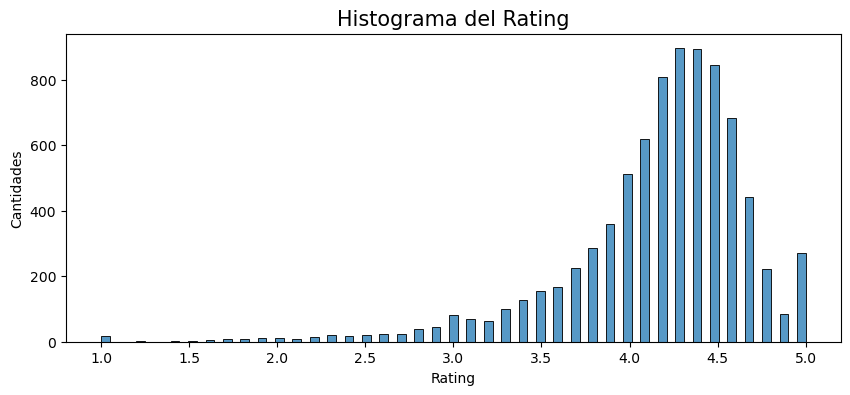

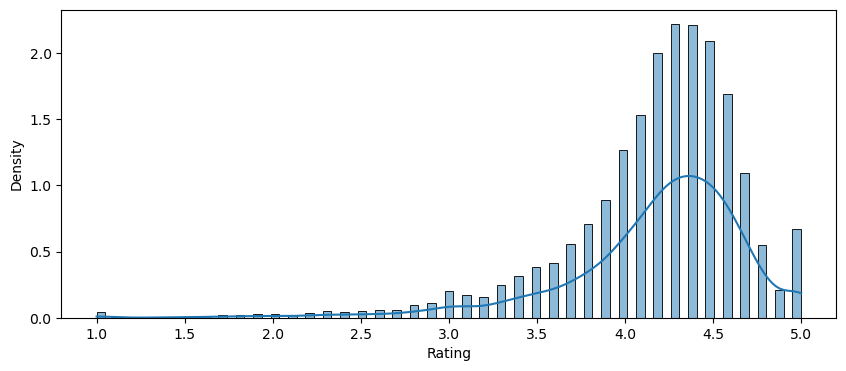

In [30]:
plt.figure(figsize=(10,4))
sns.histplot(data=google_df,
             x='Rating',stat='count',kde=False)
plt.xlabel("Rating",size = 10)
plt.ylabel("Cantidades",size = 10)
plt.title('Histograma del Rating',size = 15)
plt.show()


plt.figure(figsize=(10,4))
sns.histplot(data=google_df,
             x='Rating',stat='density',kde=True)
plt.xlabel("Rating",size = 10)
plt.ylabel("Density",size = 10)
plt.show()

In [31]:
print('\r\nSe puede observar que el rating no se distribuye de una manera normal, el rating se encuentra acumulado tendiendo a los valores más altos. La media del rating en las apps se concentra en', google_df['Rating'].mean(), 'de 5\r\n') 


Se puede observar que el rating no se distribuye de una manera normal, el rating se encuentra acumulado tendiendo a los valores más altos. La media del rating en las apps se concentra en 4.173262489312327 de 5



#### 2 ) Categorias

In [32]:
q_categorias = len(google_df['Category'].unique())
print(f'En total hay {q_categorias} categorias:\r\n')
print("\n", google_df['Category'].unique())

En total hay 33 categorias:


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


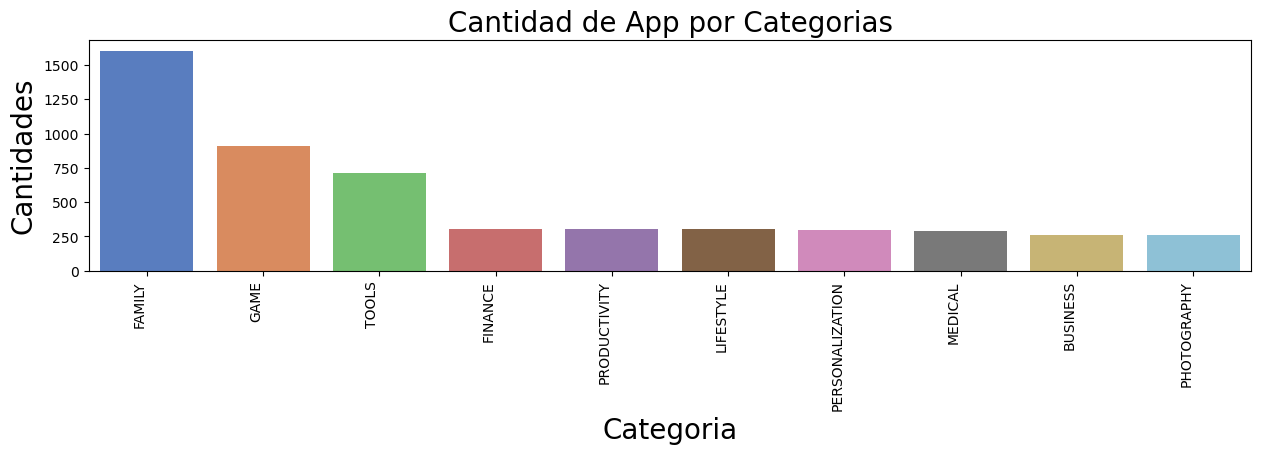

In [33]:
top_n = 10

idx_top = google_df['Category'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))

g = sns.countplot(data=google_df,
                  x="Category",
                  order=idx_top,
                  palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de App por Categorias', size = 20)
plt.xlabel("Categoria", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

#### 3) Category vs Rating

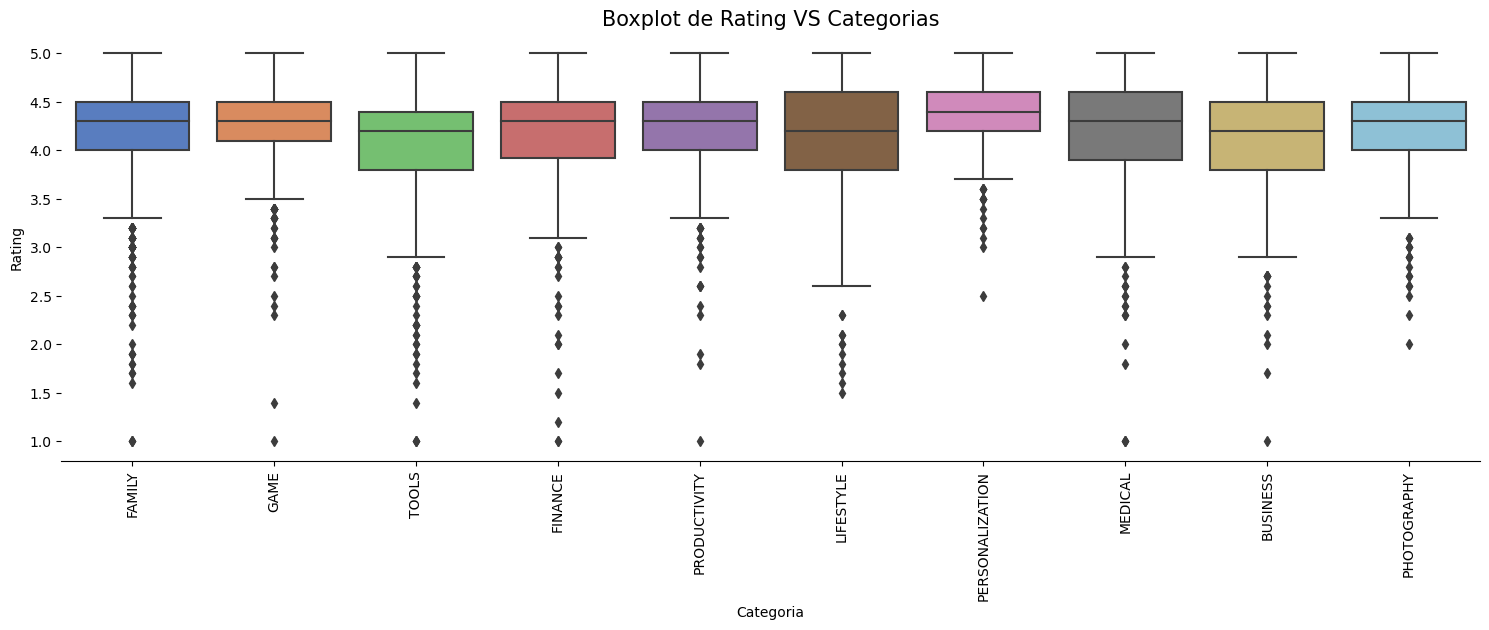

In [34]:
g = sns.catplot(data=google_df,
                x="Category",y="Rating", 
                kind="box",
                order=idx_top,
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Categoria",size = 10)
plt.ylabel("Rating",size = 10)
plt.title('Boxplot de Rating VS Categorias',size = 15)
plt.show()

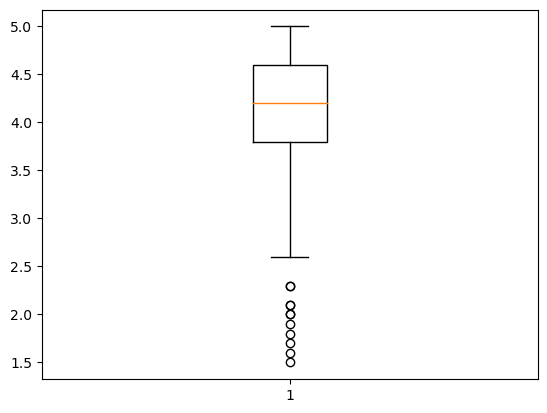

In [35]:
category_select = 'LIFESTYLE'
df_pivot = google_df[google_df['Category']==category_select]
plt.figure()
bxplot = plt.boxplot(df_pivot['Rating'])
plt.show()

In [36]:
medians = bxplot["medians"][0].get_ydata()
low_limits = bxplot["whiskers"][0].get_ydata()
up_limits = bxplot["whiskers"][1].get_ydata()
Q1 =  low_limits[0]
Q3 =  up_limits[0]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]
outliers = bxplot["fliers"][0].get_ydata()
print(f'Valor de la Mediana:\r\n {medians[0]}\r\n')
print(f'[Q1 - Q3] : [{Q1} - {Q3}]\r\n')
print(f'[Inferior  - Superior]: [{low_whiskers} - {up_whiskers}] \r\n')
print(f'Valores outliers:\r\n{outliers}\r\n')

Valor de la Mediana:
 4.2

[Q1 - Q3] : [3.8 - 4.6]

[Inferior  - Superior]: [2.6 - 5.0] 

Valores outliers:
[1.7 1.9 2.3 1.8 1.6 2.  2.  1.5 2.1 2.3 2.1]



#### 4) Reviews 

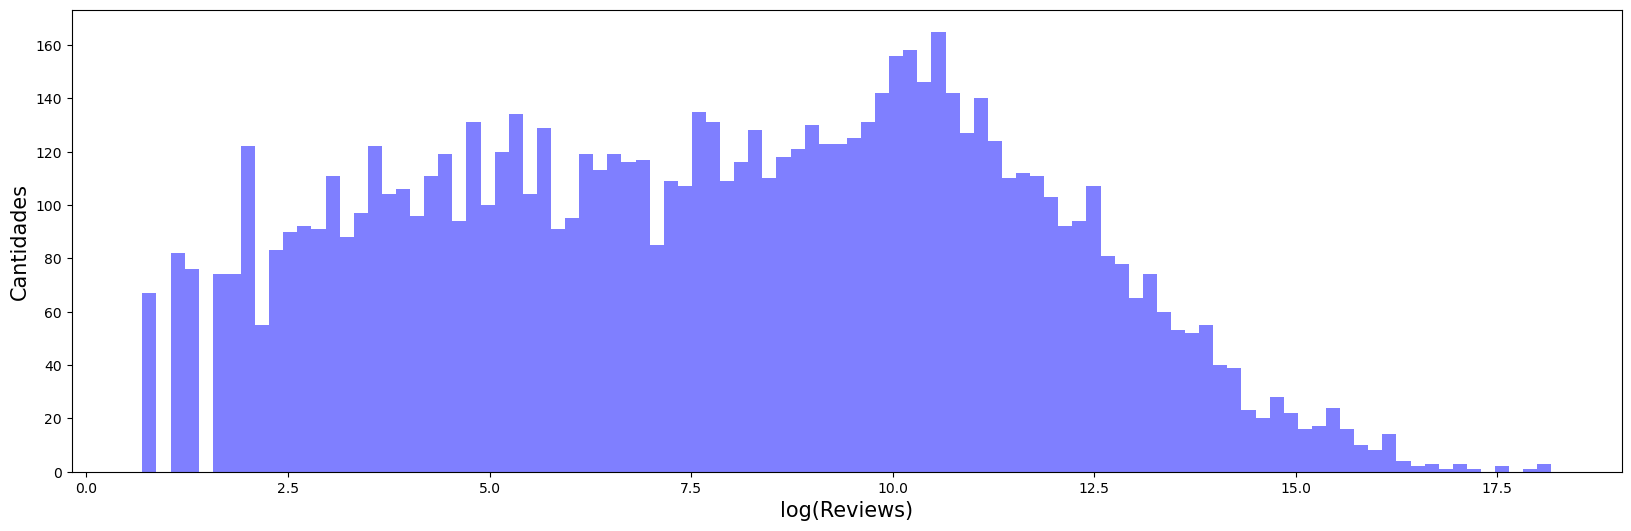

In [37]:
plt.figure(figsize=(20,6))
plt.hist(np.log(1+google_df.Reviews), bins=100,color='b' ,alpha=0.5)
plt.xlabel("log(Reviews)",size = 15)
plt.ylabel("Cantidades",size = 15)
plt.show()

In [38]:
google_df[google_df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799.0,59.185124,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854.0,59.185124,1.000000e+08,Free,0.0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


¿Existe relación entre las visitas y el resto de variables?

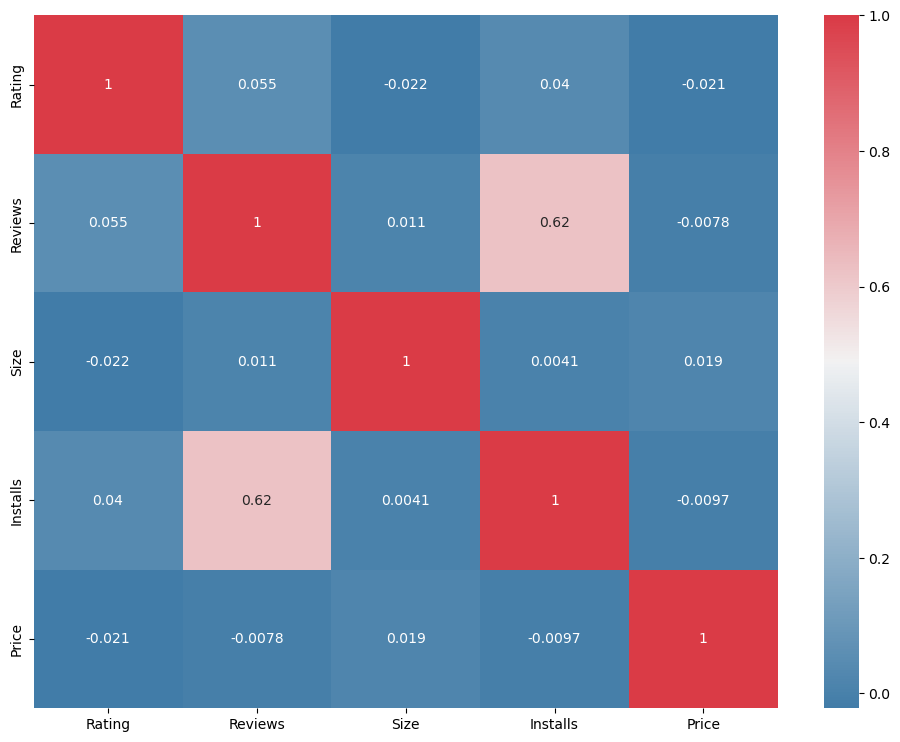

In [39]:
# Matriz de correlaciones
corr = google_df.corr()

f, ax = plt.subplots(figsize= (12, 9))
ax = sns.heatmap(corr, annot=True, cmap= sns.diverging_palette(240, 10, as_cmap=True))

Se puede ver un alto grado de correlación entre el número de instalaciones y visitas de las aplicaciones, mientras que no se observa lo mismo entre las visitas y el resto de variables

#### 5) Precio

In [40]:
google_df['Price'].describe()

count    8187.000000
mean        1.038722
std        16.867118
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [41]:
# A pesar de tener en promedio el costo de 1.03 usd hay uno de 400...
google_df[google_df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [42]:
# Segmento los precios
google_df.loc[ google_df['Price'] == 0, 'PriceBand'] = '0 - Free'
google_df.loc[(google_df['Price'] > 0) & (google_df['Price'] <= 0.99), 'PriceBand'] = '1 - Muy Barato'
google_df.loc[(google_df['Price'] > 0.99) & (google_df['Price'] <= 2.99), 'PriceBand']   = '2 - Barato'
google_df.loc[(google_df['Price'] > 2.99) & (google_df['Price'] <= 4.99), 'PriceBand']   = '3 - Normal'
google_df.loc[(google_df['Price'] > 4.99) & (google_df['Price'] <= 14.99), 'PriceBand']   = '4 - Caro'
google_df.loc[(google_df['Price'] > 14.99) & (google_df['Price'] <= 29.99), 'PriceBand']   = '5 - Muy Caro'
google_df.loc[(google_df['Price'] > 29.99), 'PriceBand']  = '6 - Excesivo'

In [43]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0 - Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0 - Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0 - Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0 - Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0 - Free


In [44]:
google_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 - Free,4.166394
1,1 - Muy Barato,4.300971
2,2 - Barato,4.293220
3,3 - Normal,4.237838
4,4 - Caro,4.235897
5,5 - Muy Caro,4.238889
6,6 - Excesivo,3.910526


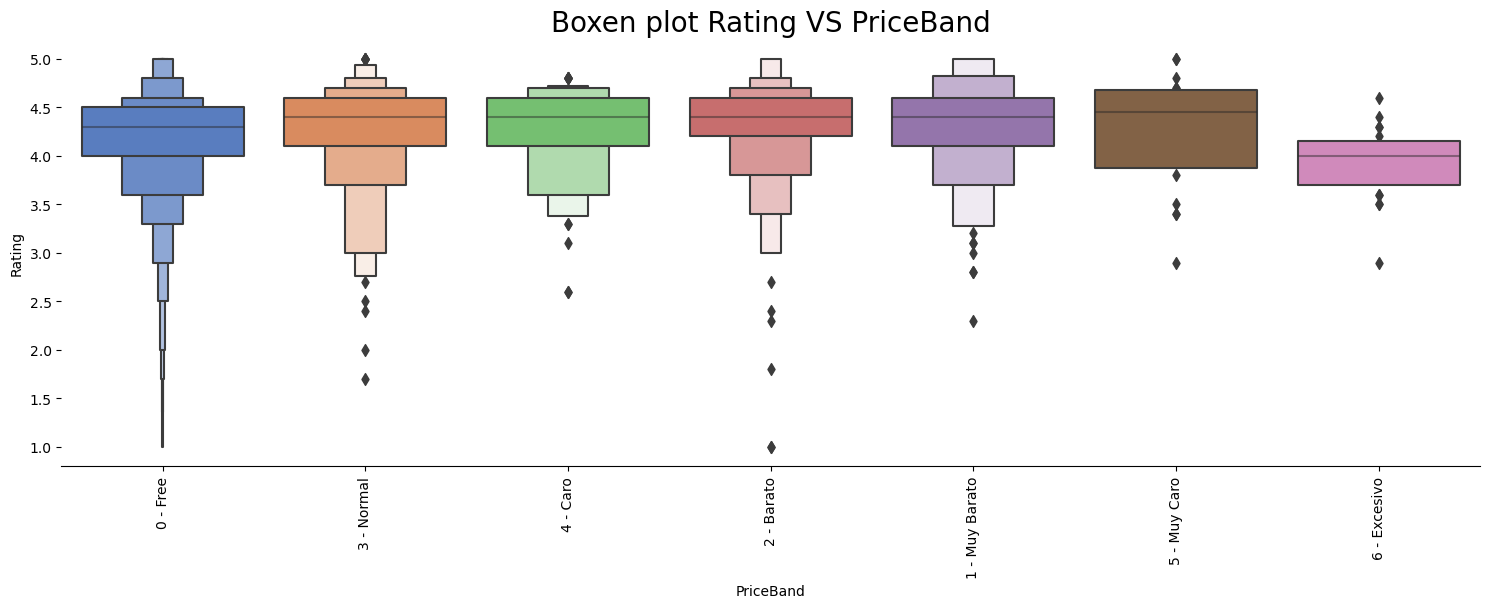

In [45]:
g = sns.catplot(data=google_df,
                x="PriceBand", y="Rating", 
                kind="boxen", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)
plt.show()

#### Apps gratuitas vs pagas

In [46]:
google_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 - Free,4.166394
1,1 - Muy Barato,4.300971
2,2 - Barato,4.293220
3,3 - Normal,4.237838
4,4 - Caro,4.235897
5,5 - Muy Caro,4.238889
6,6 - Excesivo,3.910526


No es posible determinar que el valor de las app sea un determinante para su rating